In [1]:
!pip install cirq

     |████████████████████████████████| 437 kB 4.1 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 328 kB 24.1 MB/s 
     |████████████████████████████████| 1.6 MB 37.7 MB/s 
     |████████████████████████████████| 47 kB 771 kB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 97 kB 5.9 MB/s 
     |████████████████████████████████| 52 kB 795 kB/s 
     |████████████████████████████████| 10.1 MB 10.8 MB/s 
     |████████████████████████████████| 65 kB 3.3 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 220 kB 44.6 MB/s 
     |████████████████████████████████| 145 kB 14.5 MB/s 
     |████████████████████████████████| 229 kB 46.7 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
     |████████████████████████████████| 243 kB 57.5 MB/s 
     |████████████████████████

In [2]:
!pip install ortools

     |████████████████████████████████| 14.6 MB 467 kB/s 
     |████████████████████████████████| 1.1 MB 58.9 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.


In [3]:
import numpy as np
import random
import time
import itertools as itert
import matplotlib.pyplot as plt
import cirq
from tqdm.notebook import tqdm


**Simons**'s

In [4]:
def getFx(n,verbose):  
  s = np.random.randint(2, size = n) # Generate s for the funct 
  # print(sum(s))
  # s = 0 
  funct = ["0" for i in range(2**n)] #initialise the mapping of funct 
  # if s = [0]^n, then simply make a one to one mapping from input to putput space
  if(sum(s)==0):
      tot = []
      for i in range(2**(n)):
          val = bin(i)[2:].zfill(n)
          tot.append(val)

      funct = np.random.permutation(tot) 
      if(verbose): 
        print("Function show")
      str_s = [str(int) for int in s]
      str_s = "".join(str_s)
      if(verbose): 
        print("Function is created with s = " + str_s)
        print("Input, Output")
      for i in range(2**(n)):
        val = bin(i)[2:].zfill(n)
        if(verbose):
          print(val,funct[i])
  

  # if s!=[0]^n, then create a 2 to 1 mapping function    
  else:
      tot = [] # storing function mappins
      mull = np.ones(n)
      twos = 1
      for i in range(n):
          mull[-1-i] = twos
          twos *= 2
      s_int = int(np.dot(mull,s))   # get the s value in integer form  
      for i in range(2**(n)):
          val = bin(i)[2:].zfill(n)
          tot.append(val)
      tot = np.asarray(tot)    
      tot = np.random.permutation(tot) # permute to ensure randomization
      coun = 0
      # iterate over all input space, and sequentially put "tot" contents as mapping for the function. Everytime get the XOR of the iterating index i and 
      # map that to the same value too.
      
      for i in range(2**(n)):
          compl = s_int ^ i # get the XOR of i with s to get the other input for which output is same
          if(funct[i]=="0"):
              vaa = tot[coun]
              #assign vaa to both indices
              funct[i] = vaa 
              funct[compl] = vaa
              coun += 1
      if(verbose):         
        print("Function show")
      str_s = [str(int) for int in s]
      str_s = "".join(str_s)
      if(verbose): 
        print("Function is created with s = " + str_s)
        print("Input, Output")
      for i in range(2**(n)):
        val = bin(i)[2:].zfill(n)
        if(verbose): 
          print(val,funct[i])
  return funct     


In [5]:

# Generate Uf matrix by iteratig over all possible inputs and calling the function, and doing XOR with helper bits. Set the corresponding entry in Uf matrix to 1.
def createUf(n,func):
    ufMatrix = np.zeros((2**n,2**n))
    for i in range(2**(n)):
        val = bin(i)[2:].zfill(n)
        x = val[:int(n/2)]
        b = val[int(n/2):]
       
        b = np.asarray(list(map(int,str(int(func[int(x,2)])+int(b)))))
        b[np.where(b==2)] = 0
        
        b = (''.join(map(str, b)))
        b = b.zfill(int(n/2))
        

        output = x+b
       
        ufMatrix[int(output,2)][int(val,2)] = 1
    return  ufMatrix  

# Oracle to generate the quantum gate given the Uf matrix        
class Oracle(cirq.Gate):
    def __init__(self, n, ufMatrix, name):
        self.__n = n
        self.__ufMatrix = ufMatrix
        self.__name = name

    def num_qubits(self):
        return self.__n 

    def _unitary_(self):
        return np.squeeze(np.asarray(self.__ufMatrix))
        
    def __str__(self):
        return self.__name

In [6]:
# function to verify the Uf matrix. iterate over all possible inputs
def ver(n):
  func = getFx(n,True)
  kk = createUf(2*n,func)
  dd = "".join(list(map(str,np.zeros(n, dtype=int))))
 
  for i in range(2**n):
    val = bin(i)[2:].zfill(n)
    val2 = val + dd
    print("Checking Input", val2)
    real = val+func[i]

    inp = np.zeros(2**(2*n))
    inp[int(val2,2)] = 1
    out = kk@inp
    pred = np.where(out==1)[0][0]
   
    if(int(real,2)!=pred):
      print("Error")
      print("For Input:", val)
      print("Correct value :", int(real,2),"Generated value : ", pred)
    else:
      print("Correct")  




In [7]:
ver(2)

Function show
Function is created with s = 10
Input, Output
00 00
01 10
10 00
11 10
Checking Input 0000
Correct
Checking Input 0100
Correct
Checking Input 1000
Correct
Checking Input 1100
Correct


In [8]:
from ortools.sat.python import cp_model
# class to give all possible solutions of SAT problem
class sat_solve_multiple(cp_model.CpSolverSolutionCallback):

    def __init__(self, variables):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self.__variables = variables
        self.sols = []

    def on_solution_callback(self):
        tem = []
        for v in self.__variables:
            tem.append(self.Value(v))
            self.sols.append(tem)
      
#SAT solver to solve the system of linear equations. Model using XOR gates. First n variables are declared which is length of s. Constraints are then added, and finally solver is used.
def SAT_Solver(arr):
    """Minimal CP-SAT example to showcase calling the solver."""
    model = cp_model.CpModel()

    s_len = arr.shape[1]
    num_eq = arr.shape[0]
   
    lis = []
   
    for i in range(s_len):
      lis.append(model.NewIntVar(0, 1, 'x{}'.format(i)))
   
    for i in range(num_eq):
      tem = []
      for j in range(s_len):
        if(arr[i][j]==1):
          tem.append(lis[j])
      tem.append(1)  
      model.AddBoolXOr(tem) 

    solver = cp_model.CpSolver()
    solution_printer = sat_solve_multiple(lis)
    solver.parameters.enumerate_all_solutions = True
    status = solver.Solve(model,solution_printer)
    final = solution_printer.sols[-1]
    return("".join(map(str,final)))

In [9]:
def runMainCircuit(n,verbose = True):

    # Taking the input n from the user
    if(n == 0):
        n = int(input("Enter length of function input: "))
    else:
      if(verbose):
        print('Input Length: ', n)
    
    #generate qubits line
    qubits = cirq.LineQubit.range(2*n)
   
    c = cirq.Circuit()
    # generate the function
    func = getFx(n,verbose)
    #solve for case of n=1
    if(n==1):
      if(func[0]!=func[1]):
        s = 0
        print("Predicted s = ",s)
        return 0,0,0
      else:
        s = 1
        print("Predicted s = ",s)
        return 0,0,0

 

    start = time.time()
    
    #create uf matrix
    uf = createUf(2*n,func)
    #create the oracle gate
    ufo = Oracle(2*n, uf, "Uf")
    #create the circuit
    for i in range(0,int(n)):
        c.append([cirq.H(qubits[i])])
    
     
    c.append(ufo(*qubits))
    

    for i in range(0,n):
        c.append([cirq.H(qubits[i])])
    
    # Adding measurement gates 
    for i in range(0,n):
        c.append(cirq.measure(qubits[i]))
   
    if(verbose):
      print("Circuit used to solve problem: ")
      print(c)
    mid = time.time()

    simulator = cirq.Simulator()
    
    flag = 0
    count = 0
    while(flag==0):
      result = simulator.run(c, repetitions = (n-1))
      dic = result._measurements
      bit_strings = np.asarray(list(dic.values())).squeeze().T
      if(n==2):
        bit_strings = np.expand_dims(bit_strings,0)
      #check rank of bit string matrix  
      count += 1
      if(np.linalg.matrix_rank(bit_strings)==(n-1)):
        mid2 = time.time()
        #solve using SAT solver
        s = SAT_Solver(bit_strings)
        verify = int(s,2)
        # case to handle s=0
        if(func[0]==func[verify]):
          if(verbose):
            print("\n")
            print("Predicted s = ",s)
          flag = 1
        else:
          s = "".join(map(str,np.zeros(n,dtype=int)))
          if(verbose):
            print("\n")
            print("Predicted s = ",s)
          flag = 1

      end = time.time()

    if(verbose):
      print("Time taken to create circuit: ", mid - start)
      print("Time taken for execution of quantum circuit: ", mid2 - mid)
      print("Time taken for executing classical parth: ", end - mid2)  
      print("Time taken for executing whole program: ", end - start)    

        
    return mid-start,mid2-mid,end-mid2,count

    

Correctness Test Cases:

In [10]:
a,b,c,d = runMainCircuit(3)


Input Length:  3
Function show
Function is created with s = 101
Input, Output
000 000
001 101
010 110
011 111
100 101
101 000
110 111
111 110
Circuit used to solve problem: 
0: ───H───Uf───H───M───
          │
1: ───H───#2───H───M───
          │
2: ───H───#3───H───M───
          │
3: ───────#4───────────
          │
4: ───────#5───────────
          │
5: ───────#6───────────


Predicted s =  101
Time taken to create circuit:  0.0064165592193603516
Time taken for execution of quantum circuit:  0.022136926651000977
Time taken for executing classical parth:  0.0028624534606933594
Time taken for executing whole program:  0.03141593933105469


In [11]:
a,b,c,d = runMainCircuit(4)

Input Length:  4
Function show
Function is created with s = 0101
Input, Output
0000 1100
0001 0000
0010 1110
0011 0011
0100 0000
0101 1100
0110 0011
0111 1110
1000 1000
1001 0110
1010 1101
1011 1010
1100 0110
1101 1000
1110 1010
1111 1101
Circuit used to solve problem: 
0: ───H───Uf───H───M───
          │
1: ───H───#2───H───M───
          │
2: ───H───#3───H───M───
          │
3: ───H───#4───H───M───
          │
4: ───────#5───────────
          │
5: ───────#6───────────
          │
6: ───────#7───────────
          │
7: ───────#8───────────


Predicted s =  0101
Time taken to create circuit:  0.017855167388916016
Time taken for execution of quantum circuit:  0.02021503448486328
Time taken for executing classical parth:  0.00587916374206543
Time taken for executing whole program:  0.04394936561584473


In [12]:
a,b,c,d = runMainCircuit(5)

Input Length:  5
Function show
Function is created with s = 00101
Input, Output
00000 00110
00001 00111
00010 00000
00011 11001
00100 00111
00101 00110
00110 11001
00111 00000
01000 10110
01001 10001
01010 11011
01011 01100
01100 10001
01101 10110
01110 01100
01111 11011
10000 11110
10001 01111
10010 11100
10011 01110
10100 01111
10101 11110
10110 01110
10111 11100
11000 00101
11001 00010
11010 00011
11011 01001
11100 00010
11101 00101
11110 01001
11111 00011
Circuit used to solve problem: 
0: ───H───Uf────H───M───
          │
1: ───H───#2────H───M───
          │
2: ───H───#3────H───M───
          │
3: ───H───#4────H───M───
          │
4: ───H───#5────H───M───
          │
5: ───────#6────────────
          │
6: ───────#7────────────
          │
7: ───────#8────────────
          │
8: ───────#9────────────
          │
9: ───────#10───────────


Predicted s =  00101
Time taken to create circuit:  0.040079593658447266
Time taken for execution of quantum circuit:  0.04070448875427246
Time 

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

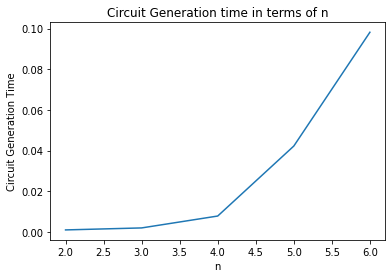

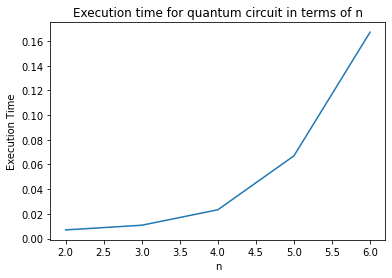

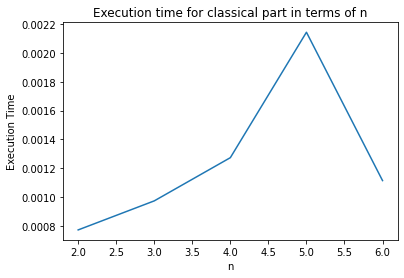

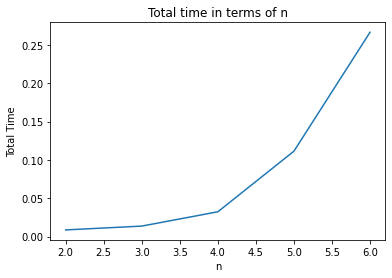

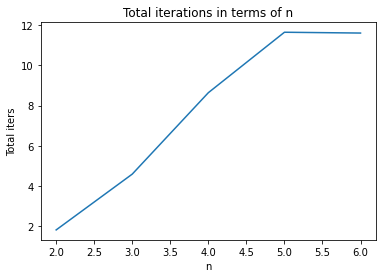

In [13]:
circuitTimes = []
execution_quantum_Times = []
execution_classical_Times = []
totalTimes = []
total_counts = []
for n in range(2, 7):
    ct = 0
    etq = 0
    etc = 0
    tt = 0
    coun = 0
    for i in tqdm(range(100)):
        (circuit, execution_q, execution_c,count) = runMainCircuit(n, False)
        ct += circuit
        etq += execution_q
        etc += execution_c
        tt += circuit + execution_q + execution_c
        coun += count
    circuitTimes.append(ct / 100)
    execution_quantum_Times.append(etq / 100)
    execution_classical_Times.append(etc / 100)
    totalTimes.append(tt / 100)
    coun = coun*(n-1)
    # print(coun)
    total_counts.append(coun/100)


x_axis = [2, 3, 4, 5, 6]
plt.plot(x_axis, circuitTimes)
plt.title('Circuit Generation time in terms of n')
plt.ylabel('Circuit Generation Time')
plt.xlabel('n')
plt.show() 

plt.plot(x_axis, execution_quantum_Times)
plt.title('Execution time for quantum circuit in terms of n')
plt.ylabel('Execution Time')
plt.xlabel('n')
plt.show() 

plt.plot(x_axis, execution_classical_Times)
plt.title('Execution time for classical part in terms of n')
plt.ylabel('Execution Time')
plt.xlabel('n')
plt.show() 

plt.plot(x_axis, totalTimes)
plt.title('Total time in terms of n')
plt.ylabel('Total Time')
plt.xlabel('n')
plt.show() 

plt.plot(x_axis, total_counts)
plt.title('Total iterations in terms of n')
plt.ylabel('Total iters')
plt.xlabel('n')
plt.show() 

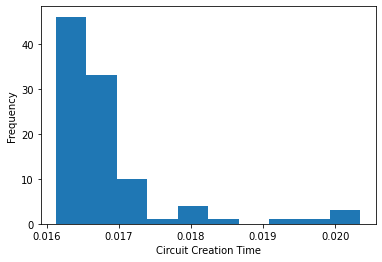

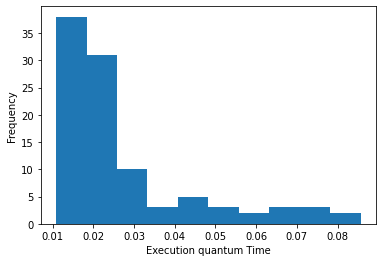

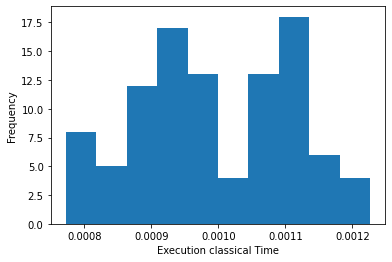

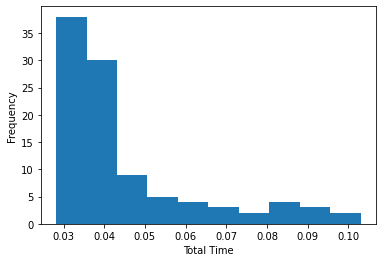

In [14]:
circuitTimes = []
execution_quantum_Times = []
execution_classical_Times = []
totalTimes = []
for i in range(100):
    (circuit , execution_q, execution_c,_) = runMainCircuit(5, False)
    circuitTimes.append(circuit)
    execution_quantum_Times.append(execution_q)
    execution_classical_Times.append(execution_c)
    totalTimes.append(circuit + execution_q + execution_c)
plt.hist(circuitTimes)
plt.xlabel('Circuit Creation Time')
plt.ylabel('Frequency')
plt.show() 

plt.hist(execution_quantum_Times)
plt.xlabel('Execution quantum Time')
plt.ylabel('Frequency')
plt.show() 

plt.hist(execution_classical_Times)
plt.xlabel('Execution classical Time')
plt.ylabel('Frequency')
plt.show() 

plt.hist(totalTimes)
plt.xlabel('Total Time')
plt.ylabel('Frequency')
plt.show() 